# Tracing Visualization

We do a similar visualization as Piech et al did in *Deep Knowledge Tracing*.
We first print out an all-skill-status prediction from a certain epoch, then visualize single students status change.

The perdiction file goes like this (each line is the probability of matering each skill):
```
First batch of students' result for the 1st question (should be the same);    
First batch of students' result for the 2nd question;    
......    
First batch of students' result for the last question;    

Second batch of students' result for the 1st question (should be the same, and same with the first batch);    
Second batch of students' result for the 2nd question;    
......    
Second batch of students' result for the last question;    

......    

Last batch of students' result for the 1st question (should be the same, and same with the first batch);    
Last batch of students' result for the 2nd question;    
......    
Last batch of students' result for the last question;    
```

The data specification.

In [71]:
batch_size = 100
num_questions = 50

num_skills = 5
num_student = 2000

import math
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

We first read in all available data, organised in a dictionary. Each run has a key, which maps to the data/status of a certain dataset and epoch.

In [72]:
status_dic = dict()
dataset_dic = dict()

def read_data(data_id, dataset_file, status_file):
    # Read in the students' actions to check if our prediction make sense.
    dataset_dic[data_id] = pd.read_csv(dataset_file)

    # Read in status
    status_file = file(status_file)
    all_status = []

    for line in status_file:
        line = line.split()
        all_status.append([])
        for stat in line:
            all_status[-1].append(float(stat))
        assert len(all_status[-1]) == num_skills

    assert len(all_status) == num_student * num_questions

    # Rearrange data: 1st student sequence; 2nd student sequence; ...
    status_per_student = []
    for batch_no in range(int(math.ceil(float(num_student) / batch_size))):
        for s in range(batch_size):
            status_per_student.append([])
            for q in range(num_questions):
                status_per_student[-1].append(all_status[batch_no * batch_size * num_questions + \
                                                         q * batch_size + s])

    assert len(status_per_student) == num_student
    status_dic[data_id] = status_per_student

read_data(2, "synthetic/set_2.csv", 'synthetic/save_during_dataset2_paraset1/all_status@epoch_297.txt')

In [73]:
# The students in the testing set are the latter half
def get_index(test_id):
    return 2000 + test_id

In [74]:
import seaborn as sns

def visualize_student(data_id, student_id):    
    # every status is the prediction for correspounding action
    status_per_timestamp = np.array(status_dic[data_id][student_id]).transpose()
    # convert to original id
    dataset = dataset_dic[data_id]
    action_per_timestamp = dataset[dataset['student'] == get_index(student_id)].values[:, 1:]

    df = pd.DataFrame(status_per_timestamp)
    action_labels = []
    for i in range(num_questions):
        action_labels.append("q" + str(action_per_timestamp[i][0]) + "|" + str(action_per_timestamp[i][1]))
    df.columns = action_labels
    
    sns.set(font_scale=1.2)
    sns.set_style({"savefig.dpi": 150})
    ax = sns.heatmap(df, cmap=plt.cm.Blues, linewidths=.1, annot=True)
    ax.xaxis.tick_top()
    fig = ax.get_figure()
    # specify dimensions
    fig.set_size_inches(40, 5)
    return fig

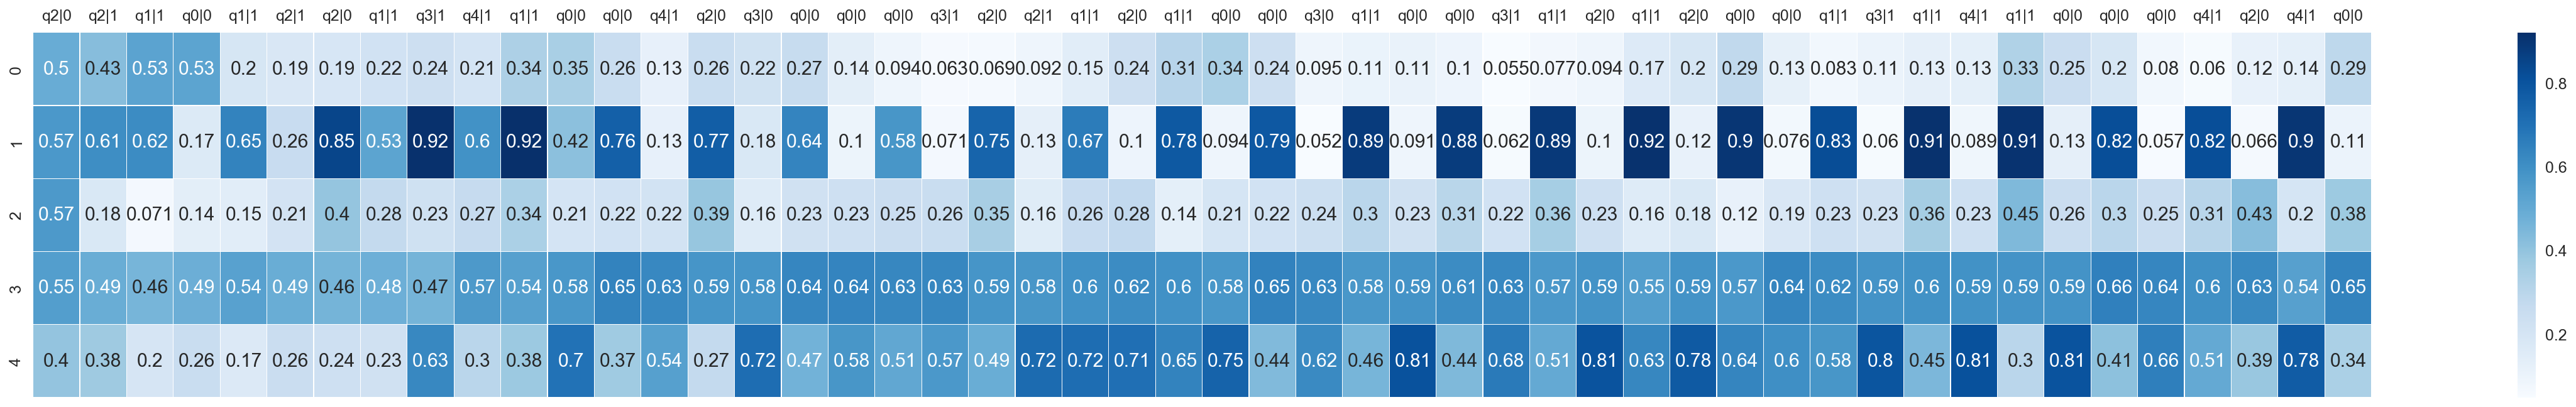

In [75]:
fig_0 = visualize_student(2, 0)
# 先check一下是不是角标算错了
# overfit to the fixed question sequence
# dropout 
# 小数据集上试一下

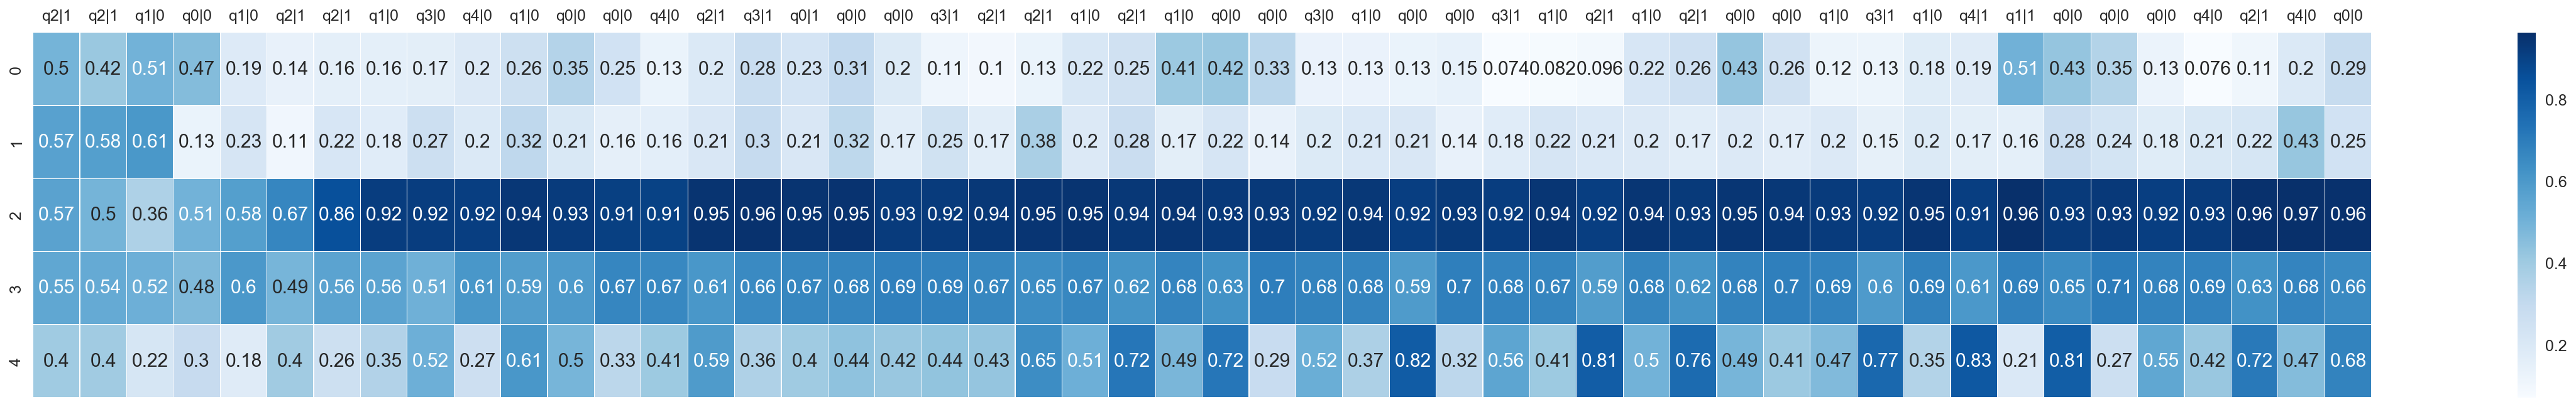

In [76]:
fig_0 = visualize_student(2, 199)

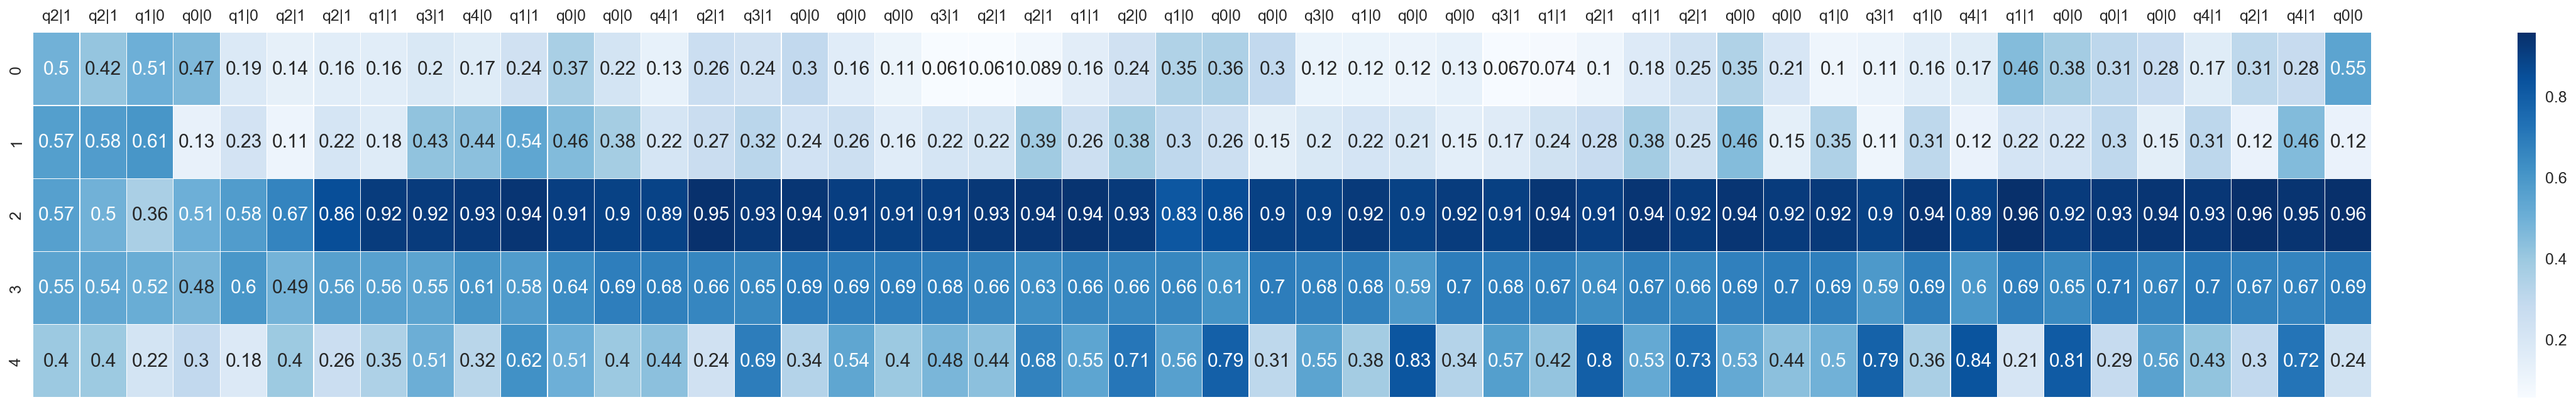

In [77]:
fig_0 = visualize_student(2, 1999)

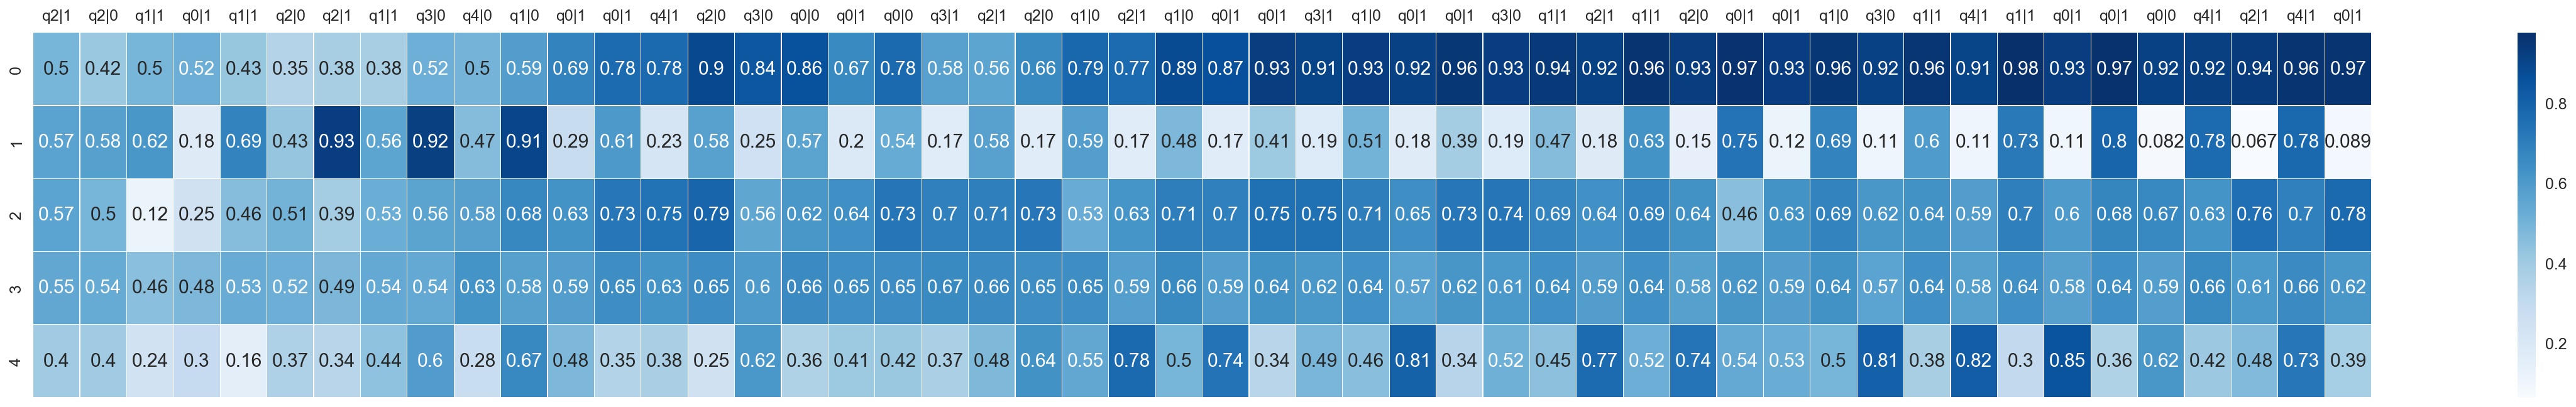

In [78]:
fig_0 = visualize_student(2, 1234)

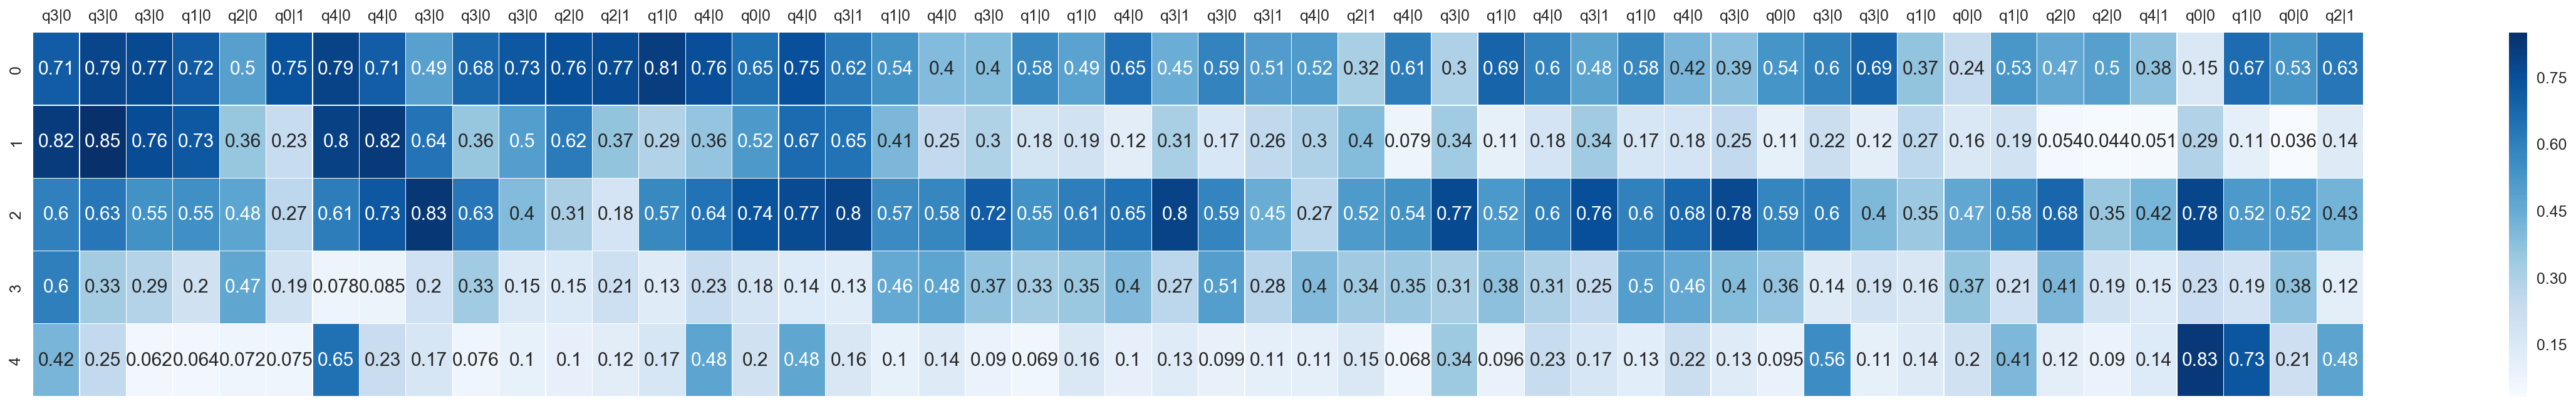

In [79]:
read_data(9, "synthetic/set_9.csv", 'synthetic/save_during_dataset9_paraset5/all_status@epoch_99.txt')
fig_0 = visualize_student(9, 0)

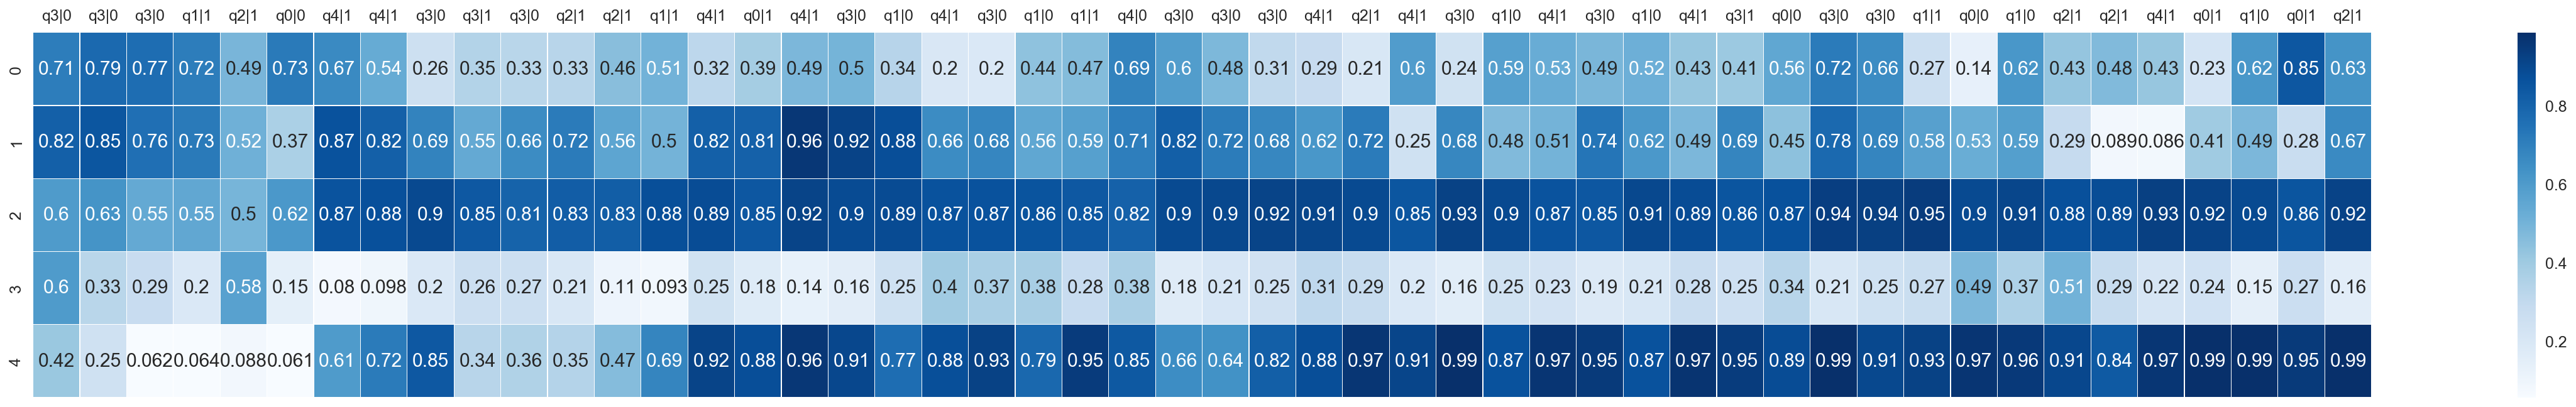

In [80]:
fig_0 = visualize_student(9, 199)

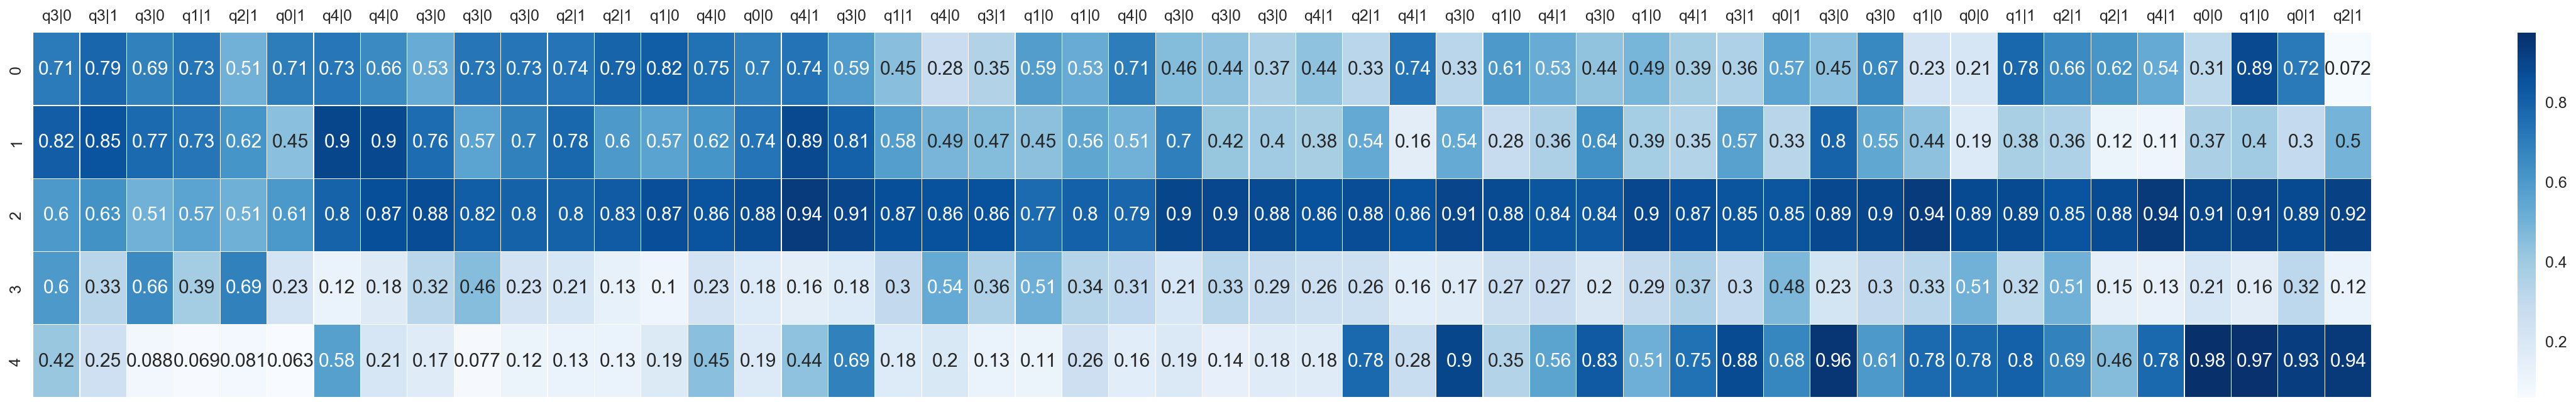

In [81]:
fig_0 = visualize_student(9, 1999)

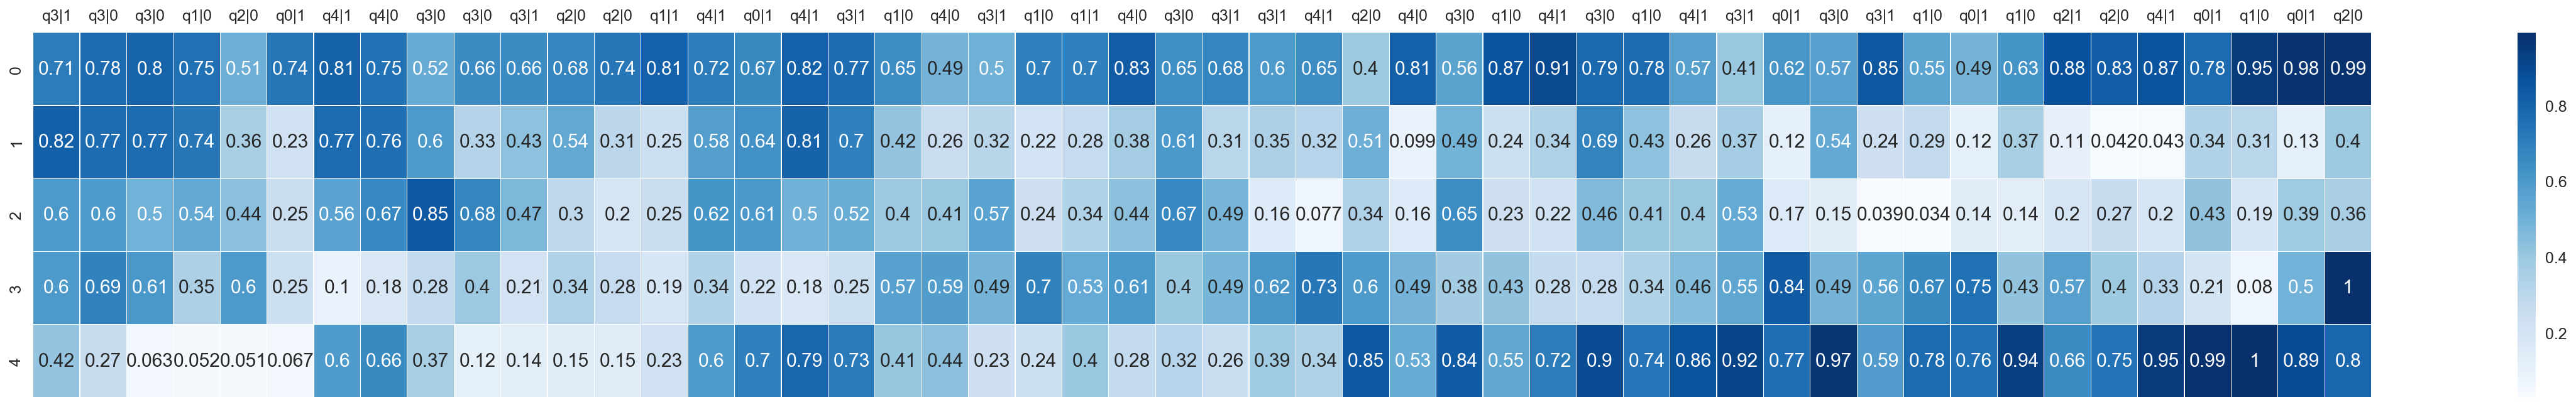

In [82]:
fig_0 = visualize_student(9, 1234)